<a href="https://colab.research.google.com/github/eashabibi/FML/blob/main/Support_Vector_Machines_Classification_on_Diabetes_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Support Vector Machine**
* Popular algorithm in supervised Learning.
* used for classification and regression,mostly for classification.
* Applications : Face detection,Text categorization,image classification.
* The goal of the SVM algorithm is to create best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in future. 
* This best decision boundary is called a hyperplane.
#**Hyperplane**:
  There can be multiple lines/decision boundaries to segregate the classes in n-dimensional space, but we need to find out best decision boundary that helps to classify the data points. This best boundary is known as the hyperplane of SVM.
#**Support Vectors**

* SVM chooses the extreme points/vectors that help in creating the hyperplane. 
* The data points or vectors that are closest to hyperplane and which affect position of hyperplane are termed as Support Vector. Since these vectors support the hyperplane, hence called a Support vector.



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# SVM Works:
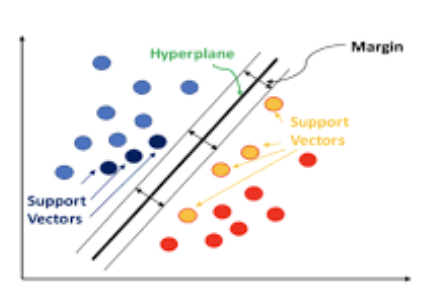
* EXAMPLE:

  Suppose we see a strange cat that also has some features of dogs, so if we want a model that can accurately identify whether it is a cat or dog, so such a model can be created by using SVM algorithm.  first train our model with lots of images of cats and dogs so that it can learn about different features of cats and dogs, and then we test it with this strange creature. So as support vector creates a decision boundary between these two data (cat and dog) and choose extreme cases (support vectors), it will see the extreme case of cat and dog. On the basis of the support vectors, it will classify it as a cat. 

In [3]:
#loading the dataset
data=pd.read_csv("/content/drive/MyDrive/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* From diabetes dataset, SVM  used to predict whether a patient has diabetes based on several features such as glucose level, blood pressure, BMI, and others.

In [4]:
# It contains 768 (rows) and 9 (coloumns)
data.shape

(768, 9)

In [5]:
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# Checking for missing values.
data.isnull().values.any()

False

# SVM Model

In [7]:
# X -- input features for model ( all columns except Outcome column)
#  y --  target variable for model ( Outcome column)

X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

In [8]:
# split the training and testing data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.02,random_state=1)

* **StandardScaler()** ---function from scikit-learn library to standardize input features in diabetes dataset.
* Data normalization-- process of transforming  feature values of dataset to have similar scale(range)  or distribution. 
*  Normalizing data is important when features have different ranges or units, which can lead to bias in the model's predictions.
* StandardScaler object(scaler)  scales ( range of values that a feature can take) training data based on its mean and standard deviation, and then returns the scaled data. 
* Normalization is important for SVM because it is sensitive to the scale of the input features.
* By normalizing the features with the StandardScaler,  all features have zero mean and unit variance.
###  This done by subtracting mean of feature from each value and then dividing by standard deviation.
##Example--
    original values of "age" range from 0 to 100 and the original values of "income" range from 0 to 100,000, the scaled values of both features would have a mean of zero and a standard deviation of one.This makes two features more comparable, even they have very different ranges of values.

 This allows the SVM model to treat all features equally and avoid biases in feature weighting.


In [9]:

# normalization of training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#scaling the testing data
X_test = scaler.transform(X_test)

#Fitting the model

In [10]:
# y_train data contains binary values indicating whether each patient has diabetes (1) or not (0).
#  During training SVM algorithm tries to learn a decision boundary that best separates data into different classes based on input features. 
# The SVC class is part of the sklearn.svm module.
# The SVC class then learns a decision boundary that separates the different classes in the input data.
model = SVC()
model.fit(X_train, y_train)

SVC()

In [11]:
#  the next step is to evaluate the performance of the model on the test data. This can be done by making predictions on the test data using the predict method of the SVC class:
y_pred = model.predict(X_test)
model.score(X_train, y_train)

# An accuracy score of 0.8204787234042553 means the model making correct predictions about 82% of training data.

0.8204787234042553

In [12]:
model.score(X_test, y_test)

1.0

In [13]:

#confusion matrix
confusion_matrix(y_test, y_pred)

array([[13,  0],
       [ 0,  3]])

16(13+3)--correctly predicted, 0--wrong predictions

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

